Домашнее задание № 7. Выполнила: Шишкина Валерия Алексеевна, 3825М1ФИ2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering, Birch
from sklearn.mixture import GaussianMixture
from sklearn.metrics import pairwise_distances
from sklearn.datasets import load_digits
from sklearn.metrics import adjusted_rand_score, silhouette_score
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings("ignore")

I. Загрузка данных.

In [3]:
df = pd.read_excel('globalterrorismdb_0718dist.xlsx')
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [4]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172451
               ...  
INT_LOG        43359
INT_IDEO       43359
INT_MISC       43359
INT_ANY        43359
related       166060
Length: 135, dtype: int64

II. Обработка пропущенных значений.

In [5]:
df_clean = df.copy()

In [6]:
threshold = len(df_clean) * 0.5
df_clean = df_clean.dropna(axis=1, thresh=threshold)

In [7]:
df_clean.isnull().sum()

eventid                 0
iyear                   0
imonth                  0
iday                    0
extended                0
country                 0
country_txt             0
region                  0
region_txt              0
provstate             421
city                  435
latitude             4556
longitude            4557
specificity             6
vicinity                0
summary             66404
crit1               30116
crit2               30116
crit3               30116
doubtterr           30116
multiple            30116
success             30116
suicide             30116
attacktype1         30116
attacktype1_txt     30116
targtype1           30116
targtype1_txt       30116
targsubtype1        39130
targsubtype1_txt    39130
corp1               72363
target1             30790
natlty1             31561
natlty1_txt         31561
gname               30337
guncertain1         35521
individual          35234
weaptype1           35234
weaptype1_txt       35234
weapsubtype1

In [8]:
df_clean = df_clean.drop(columns=['country_txt'])
df_clean = df_clean.drop(columns=['region_txt'])
df_clean = df_clean.drop(columns=['attacktype1_txt'])
df_clean = df_clean.drop(columns=['targtype1_txt'])
df_clean = df_clean.drop(columns=['targsubtype1_txt'])
df_clean = df_clean.drop(columns=['natlty1_txt'])
df_clean = df_clean.drop(columns=['weaptype1_txt'])
df_clean = df_clean.drop(columns=['weapsubtype1_txt'])
df_clean = df_clean.drop(columns=['eventid'])

In [9]:
df_clean.isnull().sum()

iyear               0
imonth              0
iday                0
extended            0
country             0
region              0
provstate         421
city              435
latitude         4556
longitude        4557
specificity         6
vicinity            0
summary         66404
crit1           30116
crit2           30116
crit3           30116
doubtterr       30116
multiple        30116
success         30116
suicide         30116
attacktype1     30116
targtype1       30116
targsubtype1    39130
corp1           72363
target1         30790
natlty1         31561
gname           30337
guncertain1     35521
individual      35234
weaptype1       35234
weapsubtype1    51382
weapdetail      81393
nkill           46149
nwound          50331
property        38582
ishostkid       38707
dbsource        43359
INT_LOG         43359
INT_IDEO        43359
INT_MISC        43359
INT_ANY         43359
dtype: int64

In [10]:
df_clean = df_clean.dropna(subset=['attacktype1'])

In [11]:
df_clean.isnull().sum()

iyear               0
imonth              0
iday                0
extended            0
country             0
region              0
provstate         420
city              432
latitude         4322
longitude        4323
specificity         6
vicinity            0
summary         66129
crit1               0
crit2               0
crit3               0
doubtterr           0
multiple            0
success             0
suicide             0
attacktype1         0
targtype1           0
targsubtype1     9014
corp1           42247
target1           674
natlty1          1445
gname             221
guncertain1      5405
individual       5118
weaptype1        5118
weapsubtype1    21266
weapdetail      51277
nkill           16033
nwound          20215
property         8466
ishostkid        8591
dbsource        13243
INT_LOG         13243
INT_IDEO        13243
INT_MISC        13243
INT_ANY         13243
dtype: int64

In [12]:
df_clean['latitude'] = pd.to_numeric(df_clean['latitude'], errors='coerce')
df_clean['longitude'] = pd.to_numeric(df_clean['longitude'], errors='coerce')

df_clean['latitude'] = df_clean['latitude'].fillna(df_clean['latitude'].median())
df_clean['longitude'] = df_clean['longitude'].fillna(df_clean['longitude'].median())

df_clean['targsubtype1'] = df_clean['targsubtype1'].fillna(-1)
df_clean['natlty1'] = df_clean['natlty1'].fillna(-1)
df_clean['weaptype1'] = df_clean['weaptype1'].fillna(-1)
df_clean['weapsubtype1'] = df_clean['weapsubtype1'].fillna(-1)
df_clean['ishostkid'] = df_clean['ishostkid'].fillna(df_clean['ishostkid'].mode()[0])
df_clean['nkill'] = df_clean['nkill'].fillna(df_clean['nkill'].mode()[0])

In [13]:
df_clean.isnull().sum()

iyear               0
imonth              0
iday                0
extended            0
country             0
region              0
provstate         420
city              432
latitude            0
longitude           0
specificity         6
vicinity            0
summary         66129
crit1               0
crit2               0
crit3               0
doubtterr           0
multiple            0
success             0
suicide             0
attacktype1         0
targtype1           0
targsubtype1        0
corp1           42247
target1           674
natlty1             0
gname             221
guncertain1      5405
individual       5118
weaptype1           0
weapsubtype1        0
weapdetail      51277
nkill               0
nwound          20215
property         8466
ishostkid           0
dbsource        13243
INT_LOG         13243
INT_IDEO        13243
INT_MISC        13243
INT_ANY         13243
dtype: int64

In [14]:
intervention_cols = ['INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY']
for col in intervention_cols:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].fillna(-9)
df_clean.isnull().sum()

iyear               0
imonth              0
iday                0
extended            0
country             0
region              0
provstate         420
city              432
latitude            0
longitude           0
specificity         6
vicinity            0
summary         66129
crit1               0
crit2               0
crit3               0
doubtterr           0
multiple            0
success             0
suicide             0
attacktype1         0
targtype1           0
targsubtype1        0
corp1           42247
target1           674
natlty1             0
gname             221
guncertain1      5405
individual       5118
weaptype1           0
weapsubtype1        0
weapdetail      51277
nkill               0
nwound          20215
property         8466
ishostkid           0
dbsource        13243
INT_LOG             0
INT_IDEO            0
INT_MISC            0
INT_ANY             0
dtype: int64

In [15]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151574 entries, 0 to 181689
Data columns (total 41 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   iyear         151574 non-null  int64  
 1   imonth        151574 non-null  int64  
 2   iday          151574 non-null  int64  
 3   extended      151574 non-null  int64  
 4   country       151574 non-null  int64  
 5   region        151574 non-null  int64  
 6   provstate     151154 non-null  object 
 7   city          151142 non-null  object 
 8   latitude      151574 non-null  float64
 9   longitude     151574 non-null  float64
 10  specificity   151568 non-null  float64
 11  vicinity      151574 non-null  int64  
 12  summary       85445 non-null   object 
 13  crit1         151574 non-null  float64
 14  crit2         151574 non-null  float64
 15  crit3         151574 non-null  float64
 16  doubtterr     151574 non-null  float64
 17  multiple      151574 non-null  float64
 18  success  

In [16]:
df_clean = df_clean.drop(columns=['provstate'])
df_clean = df_clean.drop(columns=['city'])
df_clean = df_clean.drop(columns=['summary'])
df_clean = df_clean.drop(columns=['corp1'])
df_clean = df_clean.drop(columns=['target1'])
df_clean = df_clean.drop(columns=['gname'])
df_clean = df_clean.drop(columns=['weapdetail'])
df_clean = df_clean.drop(columns=['dbsource'])

In [17]:
df_clean.isnull().sum()

iyear               0
imonth              0
iday                0
extended            0
country             0
region              0
latitude            0
longitude           0
specificity         6
vicinity            0
crit1               0
crit2               0
crit3               0
doubtterr           0
multiple            0
success             0
suicide             0
attacktype1         0
targtype1           0
targsubtype1        0
natlty1             0
guncertain1      5405
individual       5118
weaptype1           0
weapsubtype1        0
nkill               0
nwound          20215
property         8466
ishostkid           0
INT_LOG             0
INT_IDEO            0
INT_MISC            0
INT_ANY             0
dtype: int64

In [18]:
df_clean['specificity'] = df_clean['specificity'].fillna(df_clean['specificity'].mode()[0])
df_clean['guncertain1'] = df_clean['guncertain1'].fillna(df_clean['guncertain1'].median())
df_clean['individual'] = df_clean['individual'].fillna(df_clean['individual'].median())
df_clean['nwound'] = df_clean['nwound'].fillna(df_clean['nwound'].median())
df_clean['property'] = df_clean['property'].fillna(df_clean['property'].mode()[0])

In [19]:
df_clean.isnull().sum()

iyear           0
imonth          0
iday            0
extended        0
country         0
region          0
latitude        0
longitude       0
specificity     0
vicinity        0
crit1           0
crit2           0
crit3           0
doubtterr       0
multiple        0
success         0
suicide         0
attacktype1     0
targtype1       0
targsubtype1    0
natlty1         0
guncertain1     0
individual      0
weaptype1       0
weapsubtype1    0
nkill           0
nwound          0
property        0
ishostkid       0
INT_LOG         0
INT_IDEO        0
INT_MISC        0
INT_ANY         0
dtype: int64

In [20]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
iyear,151574.0,2000.352996,13.309857,1.970000e+03,1989.000000,2004.000000,2013.000000,2017.000000
imonth,151574.0,6.445848,3.392732,0.000000e+00,4.000000,6.000000,9.000000,12.000000
iday,151574.0,15.462533,8.830321,0.000000e+00,8.000000,15.000000,23.000000,31.000000
extended,151574.0,0.035567,0.185208,0.000000e+00,0.000000,0.000000,0.000000,1.000000
country,151574.0,131.930588,115.102741,4.000000e+00,69.000000,97.000000,160.000000,1004.000000
region,151574.0,6.938261,2.964027,1.000000e+00,5.000000,6.000000,10.000000,12.000000
latitude,151574.0,23.905820,19.060060,-5.315461e+01,12.895062,31.633078,34.621521,74.633553
longitude,151574.0,-544.421318,221372.659487,-8.618590e+07,-1.663077,42.563808,67.143311,179.366667
specificity,151574.0,1.428088,1.000536,1.000000e+00,1.000000,1.000000,1.000000,5.000000
vicinity,151574.0,0.065922,0.265486,-9.000000e+00,0.000000,0.000000,0.000000,1.000000


In [21]:
features_to_use = [
    'iyear', 'latitude', 'longitude',
    'multiple', 'success', 'suicide', 
    'nwound', 'nkill', 'attacktype1']

In [22]:
X_feat = df_clean[features_to_use].copy()

In [23]:
X_feat

,iyear,latitude,longitude,multiple,success,suicide,nwound,nkill,attacktype1
0,1970,18.456792,-69.951164,0.0,1.0,0.0,0.0,1.0,1.0
1,1970,19.371887,-99.086624,0.0,1.0,0.0,0.0,0.0,6.0
2,1970,15.478598,120.599741,0.0,1.0,0.0,0.0,1.0,1.0
3,1970,37.997490,23.762728,0.0,1.0,0.0,0.0,0.0,3.0
4,1970,33.580412,130.396361,0.0,1.0,0.0,0.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...
181681,2017,42.888982,13.772795,0.0,1.0,0.0,0.0,0.0,7.0
181684,2017,35.921051,64.774544,0.0,1.0,0.0,4.0,0.0,3.0
181685,2017,2.359673,45.385034,0.0,1.0,0.0,2.0,1.0,2.0
181688,2017,24.798346,93.940430,0.0,0.0,0.0,0.0,0.0,3.0


Все пропущенные значения обработаны. При обработке пропущенных значений использовались три стратегии: заполнение медианой для непрерывных числовых признаков, замена на специальное значение -1 и заполнение модой для бинарных признаков.

III. Обучение без учителя.

In [24]:
y = X_feat['attacktype1'].copy()
y

0         1.0
1         6.0
2         1.0
3         3.0
4         7.0
         ... 
181681    7.0
181684    3.0
181685    2.0
181688    3.0
181689    3.0
Name: attacktype1, Length: 151574, dtype: float64

In [25]:
X_feat = X_feat.drop(columns='attacktype1')
X_feat

,iyear,latitude,longitude,multiple,success,suicide,nwound,nkill
0,1970,18.456792,-69.951164,0.0,1.0,0.0,0.0,1.0
1,1970,19.371887,-99.086624,0.0,1.0,0.0,0.0,0.0
2,1970,15.478598,120.599741,0.0,1.0,0.0,0.0,1.0
3,1970,37.997490,23.762728,0.0,1.0,0.0,0.0,0.0
4,1970,33.580412,130.396361,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
181681,2017,42.888982,13.772795,0.0,1.0,0.0,0.0,0.0
181684,2017,35.921051,64.774544,0.0,1.0,0.0,4.0,0.0
181685,2017,2.359673,45.385034,0.0,1.0,0.0,2.0,1.0
181688,2017,24.798346,93.940430,0.0,0.0,0.0,0.0,0.0


In [26]:
X_feat.shape, y.shape

((151574, 8), (151574,))

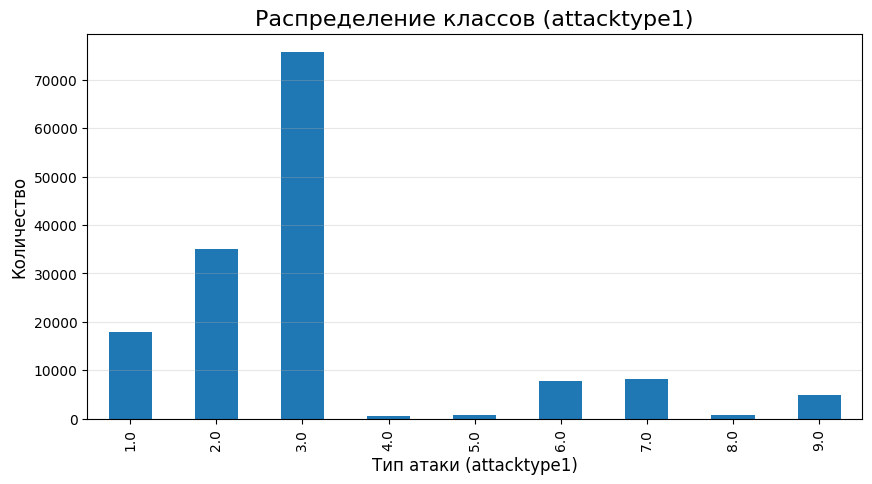

In [27]:
y.value_counts().sort_index().plot(kind='bar', figsize=(10, 5))
plt.title('Распределение классов (attacktype1)', fontsize=16)
plt.xlabel('Тип атаки (attacktype1)', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

Нормализация данных.

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_feat)

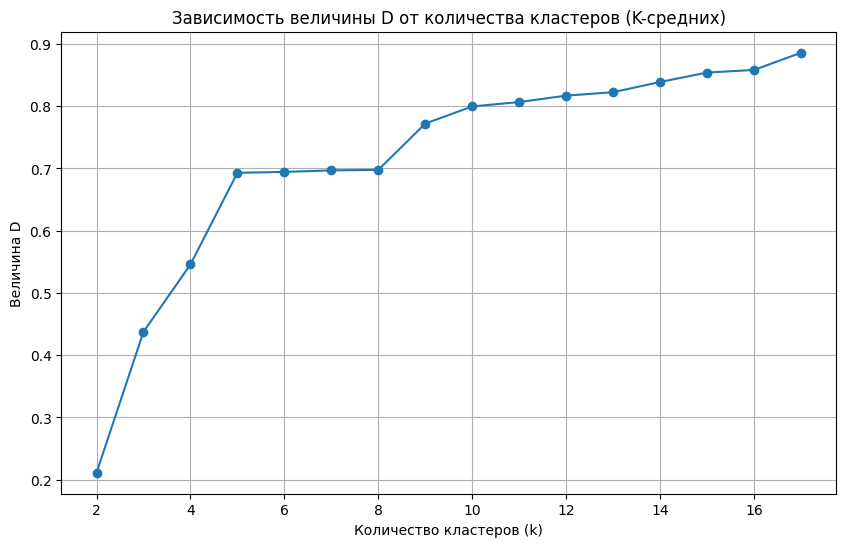

In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

def calculate_D(data, labels, centers):
    overall_center = data.mean(axis=0)
    overall_distances = np.linalg.norm(data - overall_center, axis=1)
    cluster_distances = np.linalg.norm(data - centers[labels], axis=1)
    D = (np.mean(overall_distances)**2 - np.mean(cluster_distances)**2) / np.mean(overall_distances)**2
    return D

def calculate_D_for_kmeans(data, k_range):
    D_values = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        labels = kmeans.labels_
        centers = kmeans.cluster_centers_
        D = calculate_D(data, labels, centers)
        D_values.append(D)
    return D_values

k_range = range(2, 18)
D_values_kmeans = calculate_D_for_kmeans(X_scaled, k_range)

plt.figure(figsize=(10, 6))
plt.plot(k_range, D_values_kmeans, marker='o')
plt.xlabel('Количество кластеров (k)')
plt.ylabel('Величина D')
plt.title('Зависимость величины D от количества кластеров (K-средних)')
plt.grid(True)
plt.show()

Данный график показывает, как доля объясненной дисперсии D растет по мере увеличения числа кластеров в K-means. Величина D сравнивает среднюю удаленность точек от общего центра с их средней удаленностью от центров кластеров. Значение, близкое к 0 означает, что кластеры почти не лучше общего среднего, а близкое к 1 - кластеры хорошо описывают данные. При увеличении числа кластеров с k = 2 до k = 4 D заметно возрастает примерно с 0.2 до 0.55, что говорит о резком улучшении качества кластеризации, тогда как дальнейшее увеличение k даёт лишь постепенные, менее значимые улучшения. Рост заметно замедляется при k = 9.

In [30]:
kmeans_x = KMeans(n_clusters=9, random_state=42, n_init=10)
y_pred_kmeans_x = kmeans_x.fit_predict(X_scaled)

D_kmeans = calculate_D(X_scaled, y_pred_kmeans_x, kmeans_x.cluster_centers_)
print(f"Величина D для K-средних при K = 9: {D_kmeans}")

Величина D для K-средних при K = 9: 0.7774703947187196


In [31]:
X_feat['Cluster_KMeans'] = y_pred_kmeans_x

centers_kmeans_original = scaler.inverse_transform(kmeans_x.cluster_centers_)

print("Центры кластеров в исходных значениях:\n")
display(pd.DataFrame(centers_kmeans_original, columns=X_feat.columns[:-1]))

print("\nЦентры кластеров в стандартизованных значениях:\n")
display(pd.DataFrame(kmeans_x.cluster_centers_, columns=X_feat.columns[:-1]))

Центры кластеров в исходных значениях:



,iyear,latitude,longitude,multiple,success,suicide,nwound,nkill
0,2011.584392,28.095168,5.424826e+01,-3.390344e-14,1.000000e+00,-6.938894e-15,2.640882,1.595450
1,2001.609243,21.398797,1.896459e+01,1.000000e+00,1.000000e+00,5.551115e-16,1.860192,1.070065
2,1988.055681,-1.190348,-3.544520e+01,-1.698641e-14,9.988713e-01,5.696832e-15,1.473117,2.253027
3,2003.155029,28.034678,3.074457e+01,1.026576e-01,8.326673e-15,7.355228e-16,0.486256,0.282374
4,2001.000000,40.697132,-7.393135e+01,1.000000e+00,1.000000e+00,1.000000e+00,8190.500000,1383.500000
5,2011.168430,31.219449,4.960834e+01,1.706672e-01,8.578112e-01,1.000000e+00,14.945891,7.905004
6,1982.000000,12.643985,-8.618590e+07,0.000000e+00,1.000000e+00,0.000000e+00,0.000000,5.000000
7,1987.078171,38.671896,2.060671e+01,-1.838807e-14,1.000000e+00,6.210310e-15,2.050615,1.479713
8,1998.771552,20.214608,2.601737e+01,1.120690e-01,1.000000e+00,2.112069e-01,141.086207,144.603448



Центры кластеров в стандартизованных значениях:



,iyear,latitude,longitude,multiple,success,suicide,nwound,nkill
0,0.843843,0.219798,0.002704,-0.367092,0.344543,-0.184064,-0.002183,-0.035337
1,0.094385,-0.131533,0.002545,2.724110,0.344543,-0.184064,-0.023431,-0.087033
2,-0.923928,-1.316693,0.002299,-0.367092,0.340878,-0.184064,-0.033966,0.029366
3,0.210524,0.216624,0.002598,-0.049757,-2.902395,-0.184064,-0.060824,-0.164539
4,0.048611,0.880971,0.002125,2.724110,0.344543,5.432882,222.841527,135.938924
5,0.812591,0.383716,0.002683,0.160475,-0.117135,5.432882,0.332714,0.585500
6,-1.378907,-0.590862,-389.323759,-0.367092,0.344543,-0.184064,-0.074059,0.299658
7,-0.997371,0.774716,0.002552,-0.367092,0.344543,-0.184064,-0.018248,-0.046725
8,-0.118818,-0.193663,0.002577,-0.020664,0.344543,1.002273,3.765794,14.036118


Описание кластеров:

Кластер 0: относительно поздние по времени события, происходящие в районах с немного повышенной широтой. Атаки в основном успешны, но не суицидные, число убитых и раненных около среднего или немного ниже.

Кластер 1: события примерно среднего по выборке периода, с широтами чуть ниже среднего. Для этого кластера характерна высокая доля множественных атак, однако среднее число жертв немного ниже среднего.

Кластер 2: более ранние по времени атаки, часто в регионах с низкими широтами. Успешность близка к средней, число убитых немного выше среднего, раненных - около среднего.

Кластер 3: события немного более позднего периода с координатами, близкими к средним. Характеризуются заметно более низкой успешностью атак и меньшим, чем в среднем, числом жертв.

Кластер 4: редкие, но экстремально тяжелые атаки с очень большим количеством убитых и раненых. Преобладают множественные, успешные и суицидные теракты, происходящие в регионах с высокой широтой.

Кластер 5: тяжелые суицидные атаки в относительно поздний период и в районах с несколько повышенной широтой. Число жертв значительно превышает среднее, но остается существенно ниже, чем в кластере 4.

Кластер 6: самые ранние по времени события, чаще в регионах с немного пониженной широтой. Для них характерно отсутствие суицидных и множественных атак, почти нет раненных, но число убитых немного выше среднего.

Кластер 7: относительно более ранние годы, но с заметно повышенной широтой. Остальные характеристики (успешность, тип атаки, число жертв) близки к среднему уровню по выборке.

Кластер 8: события примерно среднего периода с координатами, близкими к средним. Отличаются повышенным числом раненых и убитых, а также несколько более высокой долей суицидных и множественных атак.

In [32]:
import pandas as pd
X_feat['attacktype1'] = y

pct = (
    X_feat
    .groupby('Cluster_KMeans')['attacktype1']
    .value_counts(normalize=True)
    .mul(100)
    .rename('percent')
    .reset_index()
)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print(pct)

    Cluster_KMeans  attacktype1     percent
0                0          3.0   52.479718
1                0          2.0   27.250441
2                0          6.0    6.961199
3                0          1.0    5.663139
4                0          7.0    4.130511
5                0          9.0    2.532628
6                0          8.0    0.506173
7                0          4.0    0.255732
8                0          5.0    0.220459
9                1          3.0   64.967539
10               1          2.0   15.574982
11               1          7.0   10.554734
12               1          9.0    3.162563
13               1          6.0    2.404062
14               1          1.0    2.031240
15               1          8.0    0.752073
16               1          5.0    0.404962
17               1          4.0    0.147843
18               2          3.0   35.679595
19               2          2.0   31.106779
20               2          1.0   15.527738
21               2          6.0 

Кластеры с доминирующими типами:

Кластер 0: преобладает тип 3 (~ 52.5%), затем тип 2 (~27.3%), тип 6 (~ 7%), тип 1 (~ 6%), остальные типы занимают небольшие доли.

Кластер 1: ещe сильнее доминирует тип 3 (~ 65%), на втором месте тип 2 (~ 15.6%), далее тип 7 (~ 10.6%), остальные типы редки.

Кластер 2: более «смешанный» - типы 3 (~ 35.7%) и 2 (~ 31.1%) занимают сопоставимые доли, далее тип 1 (~ 15.5%), тип 6 (~ 7%), остальные типы - меньшинство.

Кластер 3: основной тип 3 (~ 56.2%), но заметна доля типа 1 (~ 25.2%), тип 2 (~ 9.3%), остальные типы имеют малые проценты.

Кластер 4: 100% наблюдений имеют тип атаки 4.

Кластер 5: почти полностью состоит из атак типа 3 (~ 93.8%), тип атаки 1 (~ 4%), остальные типы встречаются крайне редко.

Кластер 6: однородный - 100% событий имеют тип 2.

Кластер 7: смешанный кластер, но с доминированием типов 3 (~ 40.9%) и 2 (~ 21.9%), затем идет тип 1 (~ 19.4%), тип 7 (~ 8.6%), другие типы имеют меньшие доли.

Кластер 8: довольно равномерный между типами 2 (~ 39.7%) и 3 (~ 38.8%), затем идет тип 9 (~ 7.4%), тип 6 (~ 6.5%), тип 5 (~ 5%), остальные типы редки.

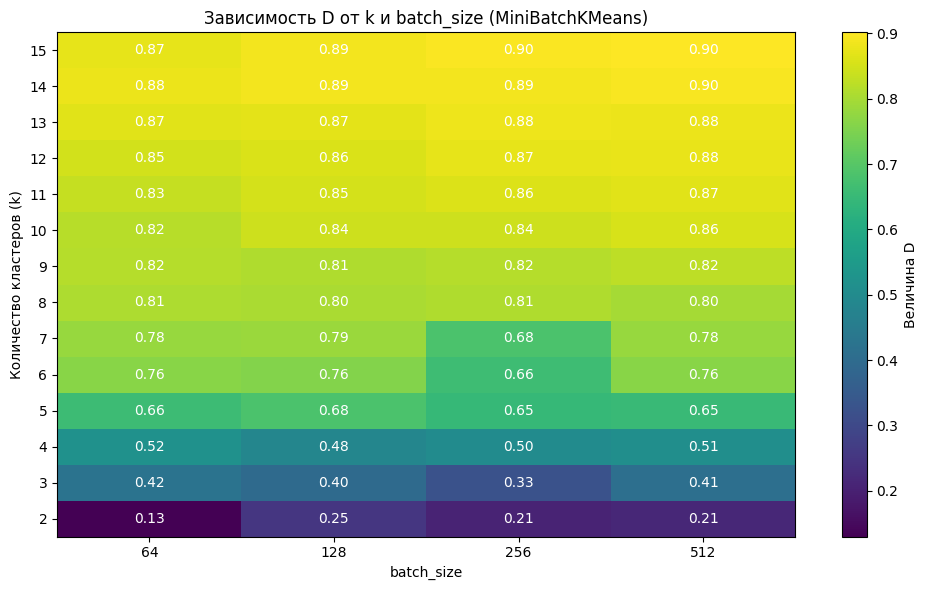

In [33]:
from sklearn.cluster import MiniBatchKMeans

def calculate_D_for_minibatch_kmeans(data, k_range, batch_sizes):
    results = {}

    for k in k_range:
        for batch_size in batch_sizes:
            mbk = MiniBatchKMeans(
                n_clusters=k,
                random_state=42,
                batch_size=batch_size
            )
            mbk.fit(data)

            labels = mbk.labels_
            centers = mbk.cluster_centers_

            D = calculate_D(data, labels, centers)
            results[(k, batch_size)] = D
    return results


k_range = range(2, 16)
batch_sizes = [64, 128, 256, 512]

D_results = calculate_D_for_minibatch_kmeans(X_scaled, k_range, batch_sizes)

D_matrix = np.zeros((len(k_range), len(batch_sizes)))
for i, k in enumerate(k_range):
    for j, b in enumerate(batch_sizes):
        D_matrix[i, j] = D_results[(k, b)]

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(D_matrix, aspect='auto', origin='lower', cmap='viridis')

cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Величина D')

ax.set_xticks(range(len(batch_sizes)))
ax.set_xticklabels(batch_sizes)
ax.set_yticks(range(len(k_range)))
ax.set_yticklabels(k_range)

ax.set_xlabel('batch_size')
ax.set_ylabel('Количество кластеров (k)')
ax.set_title('Зависимость D от k и batch_size (MiniBatchKMeans)')

# аннотации в ячейках
for i in range(D_matrix.shape[0]):
    for j in range(D_matrix.shape[1]):
        value = D_matrix[i, j]
        ax.text(
            j, i, f'{value:.2f}',
            ha='center', va='center',
            color='white'
        )

fig.tight_layout()
plt.show()

График показывает, как доля объяснtнной дисперсии D зависит сразу от двух параметров MiniBatchKMeans: числа кластеров k (по вертикали) и размера батча batch_size (по горизонтали). 

При малых k (2 - 4) D невелика, то есть данные описаны слабо. По мере увеличения k D быстро растет, при k ~ 10 - 12 достигает > 0.8 и далее растет медленнее. 

In [34]:
mbk = MiniBatchKMeans(
    n_clusters=12,
    random_state=42,
    batch_size=256
)
mbk.fit(X_scaled)

labels_mbk = mbk.labels_
centers_mbk = mbk.cluster_centers_

D_mbk = calculate_D(X_scaled, labels_mbk, centers_mbk)
print(f"Величина D для MiniBatchKMeans при K = 12, batch = 256: {D_mbk}")

Величина D для MiniBatchKMeans при K = 12, batch = 256: 0.8730160415428324


In [35]:
X_feat.head()

,iyear,latitude,longitude,multiple,success,suicide,nwound,nkill,Cluster_KMeans,attacktype1
0,1970,18.456792,-69.951164,0.0,1.0,0.0,0.0,1.0,7,1.0
1,1970,19.371887,-99.086624,0.0,1.0,0.0,0.0,0.0,7,6.0
2,1970,15.478598,120.599741,0.0,1.0,0.0,0.0,1.0,2,1.0
3,1970,37.997490,23.762728,0.0,1.0,0.0,0.0,0.0,7,3.0
4,1970,33.580412,130.396361,0.0,1.0,0.0,0.0,0.0,7,7.0


In [37]:
X_feat['Cluster_MiniBatchKMeans'] = labels_mbk
display(X_feat.head())

centers_mbk_original = scaler.inverse_transform(centers_mbk)

print("Центры кластеров MiniBatchKMeans в исходных значениях:\n")
display(
    pd.DataFrame(
        centers_mbk_original,
        columns=X_feat.columns[:-3]
    )
)

print("\nЦентры кластеров MiniBatchKMeans в стандартизованных значениях:\n")
display(
    pd.DataFrame(
        centers_mbk,
        columns=X_feat.columns[:-3]
    )
)

,iyear,latitude,longitude,multiple,success,suicide,nwound,nkill,Cluster_KMeans,attacktype1,Cluster_MiniBatchKMeans
0,1970,18.456792,-69.951164,0.0,1.0,0.0,0.0,1.0,7,1.0,10
1,1970,19.371887,-99.086624,0.0,1.0,0.0,0.0,0.0,7,6.0,11
2,1970,15.478598,120.599741,0.0,1.0,0.0,0.0,1.0,2,1.0,10
3,1970,37.997490,23.762728,0.0,1.0,0.0,0.0,0.0,7,3.0,11
4,1970,33.580412,130.396361,0.0,1.0,0.0,0.0,0.0,7,7.0,11


Центры кластеров MiniBatchKMeans в исходных значениях:



,iyear,latitude,longitude,multiple,success,suicide,nwound,nkill
0,2012.036165,32.741116,52.930782,-2.220446e-15,1.000000e+00,-1.880440e-15,2.690890,1.548618
1,1987.110041,-21.390345,-42.943067,1.082467e-15,9.656121e-01,2.220446e-16,0.862448,1.210454
2,2010.843478,7.452014,55.550861,4.579670e-16,1.000000e+00,2.220446e-16,1.873292,1.546584
3,2003.625749,29.511819,34.403205,9.880240e-02,1.088019e-14,2.220446e-16,0.441118,0.377246
4,1988.201044,9.395921,-30.679071,1.000000e+00,9.843342e-01,1.942890e-16,0.169713,0.242820
5,1994.894737,15.963774,15.353307,1.315789e-02,1.000000e+00,6.578947e-02,137.513158,79.328947
6,1994.511883,37.350219,31.863404,-1.179612e-15,1.000000e+00,2.359224e-16,2.171846,1.630713
7,2011.392523,30.379328,47.743965,1.370717e-01,8.566978e-01,1.000000e+00,13.233645,6.785047
8,2008.862782,35.153402,42.632106,1.000000e+00,1.000000e+00,2.220446e-16,2.629699,1.127820
9,2011.694268,7.199985,53.784853,1.000000e+00,9.936306e-01,1.040834e-16,1.598726,1.598726



Центры кластеров MiniBatchKMeans в стандартизованных значениях:



,iyear,latitude,longitude,multiple,success,suicide,nwound,nkill
0,0.877786,0.463552,0.002698,-0.367092,0.344543,-0.184064,-0.000822,-0.039945
1,-0.994977,-2.376504,0.002265,-0.367092,0.232888,-0.184064,-0.050586,-0.073219
2,0.788177,-0.863264,0.002710,-0.367092,0.344543,-0.184064,-0.023074,-0.040145
3,0.245890,0.294124,0.002615,-0.061674,-2.902395,-0.184064,-0.062053,-0.155204
4,-0.913007,-0.761275,0.002321,2.724110,0.293677,-0.184064,-0.069440,-0.168430
5,-0.410093,-0.416687,0.002529,-0.326419,0.344543,0.185472,3.668549,7.613350
6,-0.438858,0.705373,0.002603,-0.367092,0.344543,-0.184064,-0.014949,-0.031867
7,0.829428,0.339638,0.002675,0.056624,-0.120750,5.432882,0.286113,0.475300
8,0.639362,0.590115,0.002652,2.724110,0.344543,-0.184064,-0.002488,-0.081350
9,0.852098,-0.876487,0.002702,2.724110,0.323862,-0.184064,-0.030547,-0.035014


Описание кластеров:

Кластер 0: Поздние по времени события (год заметно выше среднего), широта немного выше средней, долгота около средней. Атаки в основном одиночные и успешные, суицидность ниже средней, число убитых и раненных близко к среднему.

Кластер 1: Довольно ранние годы, сильно южные широты, долгота близка к средней. Атаки одиночные, чуть менее успешные, чем в среднем, суицидные встречаются реже, число жертв немного ниже среднего.

Кластер 2: Поздние годы, широта чуть ниже средней, долгота около средней. Атаки одиночные и успешные, суицидность снижена, число убитых и раненых немного ниже среднего.

Кластер 3: Небольшой сдвиг в сторону более поздних лет, широта чуть выше средней. Множественность близка к средней, успешность атак сильно ниже средней, суицидность низкая, число жертв заметно ниже среднего.

Кластер 4: Более ранние годы, широта немного ниже средней. Часто множественные атаки, успешность немного выше средней, суицидность низкая, число убитых и раненных немного ниже среднего.

Кластер 5: Средний по времени период, широта и долгота немного ниже средних. В основном одиночные и успешные атаки, суицидность немного выше средней. Очень высокое число раненных и убитых: это кластер тяжелых по последствиям атак.

Кластер 6: Годы немного раньше среднего, широта заметно выше средней. Атаки одиночные и успешные, суицидность низкая, число жертв близко к среднему или чуть ниже.

Кластер 7: Поздние годы, широта немного выше средней, долгота около средней. Множественность немного выше средней, успешность чуть ниже средней. Суицидные атаки выражено чаще среднего, число убитых и раненных умеренно выше среднего.

Кластер 8: Поздние годы, широты и долготы выше среднего. Часто множественные, успешные атаки, суицидность низкая, число жертв около среднего.

Кластер 9: Поздние годы, широта ниже средней, долгота около средней. Атаки в основном множественные и успешные, суицидность низкая, число жертв немного ниже среднего.

Кластер 10: Более ранние годы, широта чуть ниже средней. Одиночные успешные атаки, суицидность низкая, число раненных близко к среднему, убитых чуть выше среднего.

Кластер 11: Самые ранние по времени события, широта заметно выше средней. Одиночные успешные атаки, суицидность низкая, число раненных немного ниже среднего, убитых тоже чуть ниже среднего.

In [38]:
pct = (
    X_feat
    .groupby('Cluster_MiniBatchKMeans')['attacktype1']
    .value_counts(normalize=True)
    .mul(100)
    .rename('percent')
    .reset_index()
)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print(pct)

     Cluster_MiniBatchKMeans  attacktype1    percent
0                          0          3.0  57.822351
1                          0          2.0  24.202587
2                          0          6.0   6.367627
3                          0          1.0   4.709756
4                          0          7.0   3.829449
5                          0          9.0   2.255639
6                          0          8.0   0.502031
7                          0          5.0   0.163452
8                          0          4.0   0.147107
9                          1          3.0  50.175029
10                         1          2.0  20.225593
11                         1          1.0  15.937378
12                         1          7.0   5.299494
13                         1          9.0   3.743680
14                         1          6.0   2.829638
15                         1          5.0   1.196033
16                         1          8.0   0.359782
17                         1          4.0   0.

Кластеры с доминирующими типами:

Кластер 0: доминирует тип 3 (~ 57.8%), затем тип 2 (~ 24.2%), тип 6 (~ 6.4%), остальные типы встречаются редко.

Кластер 1: основной тип 3 (~ 50.2%), хатем тип 2 (~ 20.2%) и тип 1 (≈15.9%), тип 7 (~ 5.3%), остальные типы имеют малые доли.

Кластер 2: два ведущих типа - 2 (~ 36.1%) и 3 (~ 34.2%), далее идут типы 6 (~ 10.2%), 1 (~ 9.2%), 7 (~ 5.2%) и остальные с долями <4%.

Кластер 3: доминирует тип 3 (~ 56.2%), затем тип 1 (~ 25.1%), тип 2 около 9.5%, остальные типы встречаются редко.

Кластер 4: основной  тип 3 (~ 69.5%), тип 2 (~ 11.8%), тип 7 (~ 7.4%) и тип 1 (~ 5%) заметны, остальные типы имеют малые доли.

Кластер 5: «смешанный» - тип 2 (~ 41.3%) и тип 3 (~ 40.7%) практически поровну, тип 9 (~ 8.1%) и тип 6 (~ 3.6%) дополняют картину, остальные типы <3%.

Кластер 6: ведущий тип 3 (~ 36.4%), далее тип 2 (~ 28.3%) и тип 1 (~ 17.9%); типы 7 (~ 7.3%), остальные типы имеют малые доли.

Кластер 7: почти однородный по типу - тип 3 составляет ~ 93.7% всех атак, остальные типы (1, 5, 2, 6, 4, 9, 7) суммарно дают лишь несколько процентов, каждый <1%.

Кластер 8: главный тип 3 (~ 65.4%), затем тип 2 (~ 15.7%) и тип 7 (~ 11.5%), остальные типы встречаются редко.

Кластер 9: доминирует тип 3 (~ 52.3%), на втором месте тип 2 (~ 23.2%), затем тип 7 (~ 14.5%), типы 6 и 9 встречаются редко (~ 5.3% и 2.5%), остальные - <1.5%.

Кластер 10: ведущие типы 2 (~ 36.2%) и 3 (~ 28.4%), тип 1 (~ 16.2%) и тип 6 (~ 8.4%) дают дополнительный вклад, остальные типы имеют доли <5%.

Кластер 11:  основной тип 3 (~ 47.9%), далее тип 1 (~ 19.4%) и тип 2 (~ 15.1%), тип 7 (~ 9.9%) и типы 6, 9 присутствуют в небольших долях (~ 2–3.5%), остальные типы <1%.

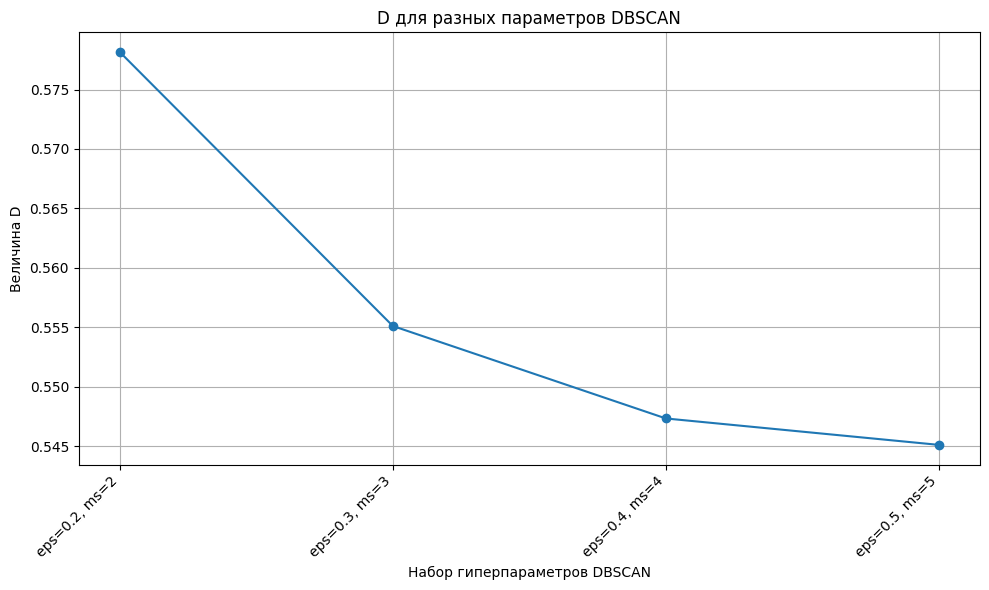

In [39]:
from sklearn.cluster import DBSCAN

def calculate_D_for_dbscan(data, eps_list, min_samples_list):
    D_values = []

    for eps, min_samples in zip(eps_list, min_samples_list):
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(data)

        mask = labels != -1
        labels_clean = labels[mask]
        data_clean = data[mask]

        if len(np.unique(labels_clean)) == 0:
            D_values.append(None)
            continue

        centers = []
        for lab in np.unique(labels_clean):
            centers.append(data_clean[labels_clean == lab].mean(axis=0))
        centers = np.vstack(centers)

        D = calculate_D(data_clean, labels_clean, centers)
        D_values.append(D)

    return D_values

eps_list = [0.2, 0.3, 0.4, 0.5]
min_samples_list = range(2, 12)

D_values_dbscan = calculate_D_for_dbscan(X_scaled, eps_list, min_samples_list)

param_labels = [f'eps={e}, ms={m}' for e, m in zip(eps_list, min_samples_list)]
x = range(len(param_labels))

plt.figure(figsize=(10, 6))
plt.plot(x, D_values_dbscan, marker='o')
plt.xticks(x, param_labels, rotation=45, ha='right')
plt.xlabel('Набор гиперпараметров DBSCAN')
plt.ylabel('Величина D')
plt.title('D для разных параметров DBSCAN')
plt.grid(True)
plt.tight_layout()
plt.show()

In [40]:
dbscan = DBSCAN(eps=0.2, min_samples=2)
dbscan.fit(X_scaled)

labels_dbscan = dbscan.labels_

mask = labels_dbscan != -1
data_clean = X_scaled[mask]
labels_clean = labels_dbscan[mask]

unique_labels = np.unique(labels_clean)

centers_dbscan = np.vstack([
    data_clean[labels_clean == lab].mean(axis=0) for lab in unique_labels
])

D_dbscan = calculate_D(data_clean, labels_clean, centers_dbscan)
print(f"Величина D для DBSCAN (eps=0.2, min_samples=2): {D_dbscan}")

Величина D для DBSCAN (eps=0.2, min_samples=2): 0.5781608853498188


In [42]:
X_feat['Cluster_DBSCAN'] = labels_dbscan
display(X_feat.head())

centers_dbscan_original = scaler.inverse_transform(centers_dbscan)

print("Центры кластеров DBSCAN в исходных значениях (без шума):\n")
display(
    pd.DataFrame(
        centers_dbscan_original,
        columns=X_feat.columns[:-4],
        index=[f'cluster_{lab}' for lab in unique_labels]
    )
)

print("\nЦентры кластеров DBSCAN в стандартизованных значениях:\n")
display(
    pd.DataFrame(
        centers_dbscan,
        columns=X_feat.columns[:-4],
        index=[f'cluster_{lab}' for lab in unique_labels]
    )
)

,iyear,latitude,longitude,multiple,success,suicide,nwound,nkill,Cluster_KMeans,attacktype1,Cluster_MiniBatchKMeans,Cluster_DBSCAN
0,1970,18.456792,-69.951164,0.0,1.0,0.0,0.0,1.0,7,1.0,10,0
1,1970,19.371887,-99.086624,0.0,1.0,0.0,0.0,0.0,7,6.0,11,0
2,1970,15.478598,120.599741,0.0,1.0,0.0,0.0,1.0,2,1.0,10,0
3,1970,37.997490,23.762728,0.0,1.0,0.0,0.0,0.0,7,3.0,11,0
4,1970,33.580412,130.396361,0.0,1.0,0.0,0.0,0.0,7,7.0,11,0


Центры кластеров DBSCAN в исходных значениях (без шума):



,iyear,latitude,longitude,multiple,success,suicide,nwound,nkill
cluster_0,1999.419366,23.535734,22.793888,3.164552e-13,1.000000e+00,-2.417511e-14,1.536239e+00,1.346277e+00
cluster_1,2002.917947,28.033572,31.109958,-1.944278e-14,1.536549e-13,3.760880e-15,3.754136e-01,1.721932e-01
cluster_2,2002.015404,23.206994,21.119545,1.000000e+00,1.000000e+00,3.844147e-15,1.134957e+00,5.704968e-01
cluster_3,1971.741573,39.565664,-20.705261,1.000000e+00,-1.110223e-15,-3.469447e-17,3.996803e-15,1.554312e-15
cluster_4,1970.571429,18.421125,-66.075311,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
cluster_5,1970.000000,40.697132,-73.931351,1.000000e+00,1.000000e+00,0.000000e+00,1.350000e+01,0.000000e+00
cluster_6,1970.333333,18.382061,-66.812656,1.000000e+00,-1.110223e-16,0.000000e+00,0.000000e+00,0.000000e+00
cluster_7,1970.500000,11.572694,113.835580,0.000000e+00,1.000000e+00,0.000000e+00,1.100000e+01,1.500000e+00
cluster_8,1971.000000,-22.908278,-43.197026,0.000000e+00,-1.110223e-16,0.000000e+00,5.000000e-01,0.000000e+00
cluster_9,1972.000000,52.928070,-3.356095,0.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,7.000000e+00



Центры кластеров DBSCAN в стандартизованных значениях:



,iyear,latitude,longitude,multiple,success,suicide,nwound,nkill
cluster_0,-0.070146,-0.019417,0.002562,-0.367092,0.344543,-0.184064,-0.032248,-0.059854
cluster_1,0.192711,0.216566,0.002600,-0.367092,-2.902395,-0.184064,-0.063841,-0.175380
cluster_2,0.124901,-0.036665,0.002555,2.724110,0.344543,-0.184064,-0.043169,-0.136188
cluster_3,-2.149649,0.821608,0.002366,2.724110,-2.902395,-0.184064,-0.074059,-0.192323
cluster_4,-2.237565,-0.287759,0.002161,2.724110,0.344543,-0.184064,-0.074059,-0.192323
cluster_5,-2.280497,0.880971,0.002125,2.724110,0.344543,-0.184064,0.293362,-0.192323
cluster_6,-2.255453,-0.289809,0.002157,2.724110,-2.902395,-0.184064,-0.074059,-0.192323
cluster_7,-2.242931,-0.647069,0.002974,-0.367092,0.344543,-0.184064,0.225321,-0.044729
cluster_8,-2.205365,-2.456144,0.002264,-0.367092,-2.902395,-0.184064,-0.060450,-0.192323
cluster_9,-2.130232,1.522679,0.002444,-0.367092,0.344543,-0.184064,0.415836,0.496451


In [43]:
pct = (
    X_feat
    .groupby('Cluster_DBSCAN')['attacktype1']
    .value_counts(normalize=True)
    .mul(100)
    .rename('percent')
    .reset_index()
)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print(pct)

      Cluster_DBSCAN  attacktype1     percent
0                 -1          3.0   56.867196
1                 -1          2.0   27.241771
2                 -1          9.0    5.448354
3                 -1          1.0    4.313280
4                 -1          6.0    2.005297
5                 -1          5.0    1.437760
6                 -1          7.0    1.210745
7                 -1          8.0    1.097238
8                 -1          4.0    0.378358
9                  0          3.0   45.212023
10                 0          2.0   26.613831
11                 0          1.0   11.886355
12                 0          6.0    6.250111
13                 0          7.0    5.364693
14                 0          9.0    3.195818
15                 0          5.0    0.615635
16                 0          8.0    0.482071
17                 0          4.0    0.379465
18                 1          3.0   55.959121
19                 1          1.0   26.939196
20                 1          2.0 

Описать получившийся вывод метода DBSCAN достаточно трудно из-за большого количества кластеров, но в общем случае каждый кластер характеризуется по той же конструкции, что в предыдущих двух алгоритмах: по среднему году событий, географическому положению, типу атаки и среднему числу жертв. При этом величина D получилась существенно меньше, чем для KMeans и MiniBatchKMeans, что говорит о менее компактных и хуже разделённых кластерах в терминах объяснённой дисперсии. Это может быть связано с тем, что DBSCAN выделяет много небольших кластеров и шумовых точек, поэтому его центры хуже описывают глобальную структуру данных по сравнению с методами на основе K‑средних.

ОБЩИЕ ВЫВОДЫ

Структура данных

Во всех вариантах кластеризации (KMeans, MiniBatchKMeans, DBSCAN) выделяются кластеры с сильно повышенным числом жертв и кластеры «обычных» или маложертвенных атак, то есть тяжесть последствий является одним из главных факторов структурирования данных.

Важную роль играют год и география: есть группы ранних событий в одних регионах и более поздних событий в других, что показывает временно‑пространственную неоднородность терактов.

Сравнение алгоритмов

KMeans и MiniBatchKMeans дают высокие значения D (до ~0.8–0.9), то есть хорошо объясняют дисперсию данных при разумном числе кластеров. MiniBatchKMeans при этом показывает сопоставимое качество при большом выигрыше по скорости.

DBSCAN показал заметно меньшие значения D (~0.55–0.58) и породил много мелких кластеров, что говорит о том, что при выбранных гиперпараметрах он хуже описывает глобальную структуру данных, чем методы на основе K‑средних.